## K Nearest Neighbor
### Alicia Brown
#### 143960

##### Generate a data set with many circles distributed in a plane. The points inside the circles belong to category “in” and the point outside to category “out”.

In [23]:
import numpy as np
import random as rnd
import sklearn.svm as svm
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.neighbors as knn

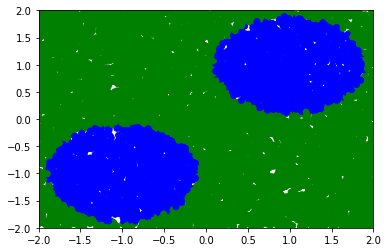

In [34]:
n_puntos = 10000
x_1 = [np.random.uniform(-2,2) for iter in range(n_puntos)]
x_2 = [np.random.uniform(-2,2) for iter in range(n_puntos)]

xx_1 = [(x_1[i]-1)**2 for i in range(len(x_1))]
xx_2 = [(x_2[i]-1)**2 for i in range(len(x_1))]

xxx_1 = [(x_1[i]+1)**2 for i in range(len(x_1))]
xxx_2 = [(x_2[i]+1)**2 for i in range(len(x_1))]


y = [(xx_1[i] + xx_2[i]) <= 0.8 or (xxx_1[i] + xxx_2[i]) <= 0.8 for i in range(len(x_1))]

plt.scatter(x_1, x_2, c=['blue' if i else 'green' for i in y])
plt.ylim([-2,2])
plt.xlim([-2,2])

plt.show()

X_train=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75))]) 
Y_train=np.asarray([[y[i]] for i in range(int(len(y)*0.75))])

X_test=np.asarray([[x_1[i], x_2[i]] for i in range(int(len(x_1)*0.75),len(x_1))]) 
Y_test=np.asarray([[y[i]] for i in range(int(len(y)*0.75),len(y))])

##### Compare with an SVM or Neural net.

KNN model accuracy: 
0.988


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


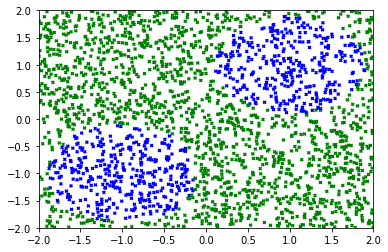

In [39]:
import sklearn.neighbors as knn
print("KNN model accuracy: ")
knnM=knn.KNeighborsClassifier(n_neighbors=5)
knnM.fit(X_train, Y_train)
Y_knn = knnM.predict(X_test)
print(knnM.score(X_test,Y_test))

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['blue' if i==1 else 'green' for i in Y_knn],s=8)
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.show()
plt.clf()

SVM model accuracy: 
0.9924


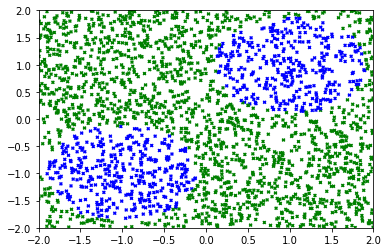

In [38]:
from sklearn import svm

print("SVM model accuracy: ")
sv3=svm.SVC(kernel='rbf')
sv3.fit(X_train, Y_train)
Y_svm3 = sv3.predict(X_test)
print(sv3.score(X_test,Y_test)) 

plt.scatter(X_test[:,0],X_test[:,1],marker ="x",\
            c=['blue' if i==1 else 'green' for i in Y_svm3],\
            s=8)
plt.ylim([-2,2])
plt.xlim([-2,2])
plt.show()
plt.clf()